# Computation of Persistence Diagrams

We now understand the full mathematical pipeline for creating a persistence diagram from a dataset:

Dataset $\to$ Filtered Simplicial Complex $\to$ Persistence Module $\to$ Persistence Diagram

 - The first step is accomplished by, for example, assigning a sequence of Vietoris-Rips complexes to point cloud data. 
 - The second step involves computing the $k$ th homology vector space of each Vietoris-Rips complex. 
 - Finally, the last step follows from the interval decomposition we get from the Fundamental Theorem of Persistent Homology.
 
In this notebook, we will look at a few more examples of persistence diagrams generated from toy datasets.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.metrics import pairwise_distances

## Some 2-Dimensional Datasets

Let's look at a dataset consisting of a pair of circles in the plane. We can parameterize our example by including a variable radius and offset parameter. One circle will always be radius 1, centered at the origin. The other circle will be variable. We can also include variable noise terms.

In [7]:
def create_circle_data(radius, x_offset, noise1 = 0.5, noise2 = 0.5, num_points1 = 50, num_points2 = 50):
    """
    This function generates a dataset with two classes in the shape of concentric circles.
    
    Args:
    radius (float) : The radius of Inner Circle > 0
    x_offset (float) : Distance between Centroids of both circles along x-axis (Right to Left)
    noise1 (float) : Noise factor for Class 1 [random uniform addition]
    noise2 (float) : Noise factor for Class 2 [random uniform addition]
    num_points1 (int) : No. of points in Class 1
    num_points2 (int) : No. of points in Class 2
    
    Returns:
    X: A numpy array with dimensions (num_points1+num_points2, 2).
        The first num_points1 rows will be in the shape
        of an inner circle, and the remaining rows will be in
        the shape of an outer concentric circle
        
    """

    # Generate Points for Class 1 - Left Circle:
    A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points1)
    A = A.T/np.linalg.norm(A,axis = 1) # Normalize them to Unit Vectors
    A = A.T + noise1*np.random.rand(num_points1,2) # Add some Uniform Random noise to it.

    # Generate Points for Class 2 - Right Circle:
    B = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points2)
    B = radius*B.T/np.linalg.norm(B,axis = 1) # Scale them up to provided Radius
    B = B.T + noise2*np.random.rand(num_points2,2) + [x_offset,0] # Shift & Add Random noise

    # Concatenate the Class1 & Class2 datasets:
    X = np.concatenate((A,B))
    
    return X

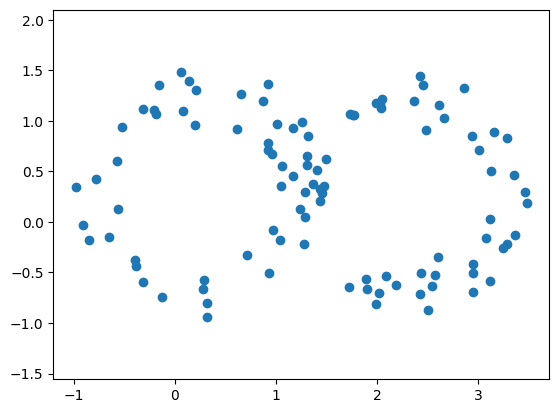

In [8]:
X = create_circle_data(1,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

We'll use a TDA package called `gudhi`. Documentation for the package is here: http://gudhi.gforge.inria.fr. Feel free to use other TDA packages in your projects

In [ ]:
import gudhi as gd

In `gudhi`, we generate a Vietoris-Rips complex based on a distance matrix. I'm only generating the $2$-skeleton of the VR complex. Furthermore, there is a `max_edge_length` parameter: only edges of length smaller than or equal to this value are included in the 1-skeleton.

In [10]:
D = pairwise_distances(X);
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)

The VR complex is stored as a simplicial complex, together with a 'filtration' value for the simplex. This is the radius at which the simplex first appears in $\mathrm{VR}_r(X)$. 

Let's see how many simplices there are and print off the first couple of hundred to see what the structure looks like.

In [11]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
for splx in rips_list[0:200] :
    print(splx)

Number of Simplices: 166750
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([74], 0.0)
([75], 0.0)
([76], 0.0)
([77], 0.0)
([78], 0.0)
([79], 0.0)
([80], 0.0)
([81], 0.0

Now, we have a VR complex. The next step is to compute the persistence module.

In [12]:
BarCodes = Rips_complex.persistence()
BarCodes

[(1, (0.49561158812178424, 1.3905051823477388)),
 (1, (0.6048864854988844, 1.2954178760467714)),
 (1, (0.2128322750471697, 0.3476007940155315)),
 (1, (0.44509320040413836, 0.5454341977206355)),
 (1, (0.38304585882421244, 0.4699877310024961)),
 (1, (0.2648375840213661, 0.34687537693653453)),
 (1, (0.3483462823428986, 0.39611575835021146)),
 (1, (0.20236756898996783, 0.21430920573982082)),
 (1, (0.3396976343823999, 0.34417231138901133)),
 (1, (0.3561986937462741, 0.359233606594125)),
 (0, (0.0, inf)),
 (0, (0.0, 0.4676787871934073)),
 (0, (0.0, 0.4256361285620203)),
 (0, (0.0, 0.41333141091271997)),
 (0, (0.0, 0.3751030697045127)),
 (0, (0.0, 0.3455058632282354)),
 (0, (0.0, 0.3446944002189895)),
 (0, (0.0, 0.3446209481459039)),
 (0, (0.0, 0.34444543931445076)),
 (0, (0.0, 0.34043142845738855)),
 (0, (0.0, 0.3360401367585042)),
 (0, (0.0, 0.3256645643790008)),
 (0, (0.0, 0.31607096143036084)),
 (0, (0.0, 0.3003967183132108)),
 (0, (0.0, 0.2905826672735995)),
 (0, (0.0, 0.2851248009897755

So it's a bunch of things of the form $(d,(x,y))$. We can plot these things in a couple of ways. Let's see if we can guess what this representation is telling us about the data.

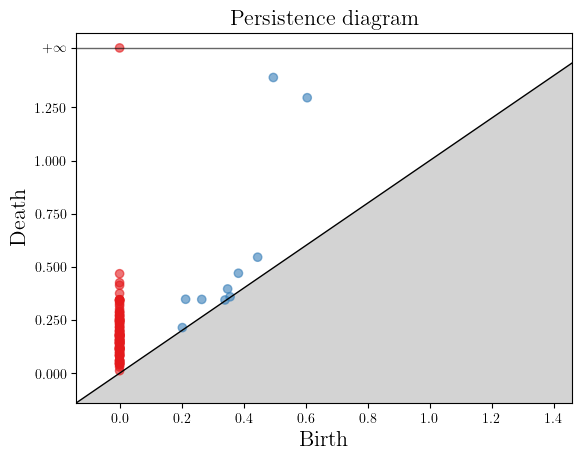

In [13]:
gd.plot_persistence_diagram(BarCodes)
plt.show()

The following is called a barcode representation

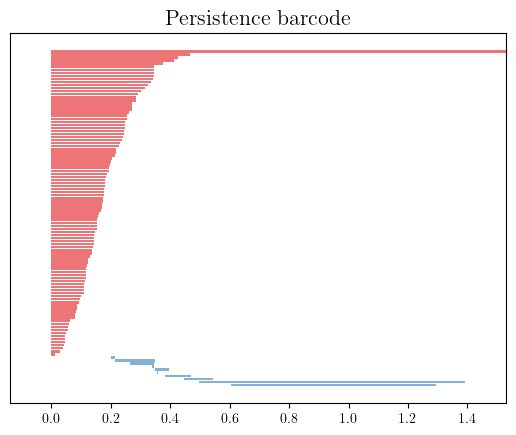

In [14]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

Now, we summarize everything into the following function which will take a point cloud and produce either barcodes or persistence diagrams. 

In [9]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

Let's test it:

Dimension 0


<Figure size 640x480 with 0 Axes>

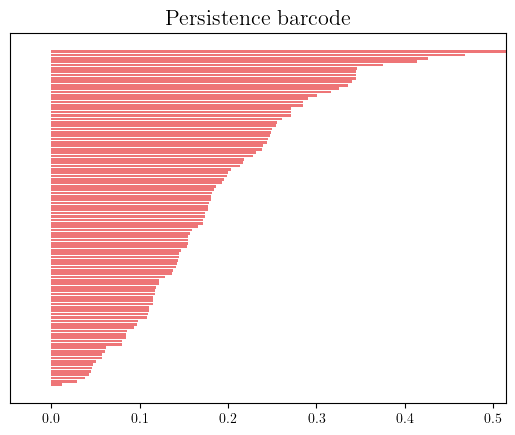

Dimension 1


<Figure size 640x480 with 0 Axes>

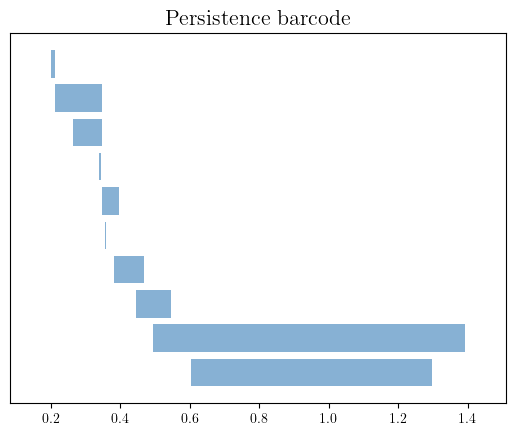

In [15]:
visualize_persistent_homology(X)

<Figure size 640x480 with 0 Axes>

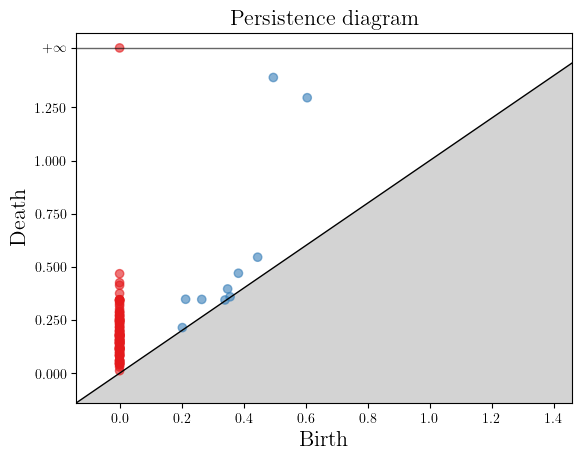

In [16]:
visualize_persistent_homology(X, style = 'diagrams')

Now we can try this on different point clouds and see if the results make sense.

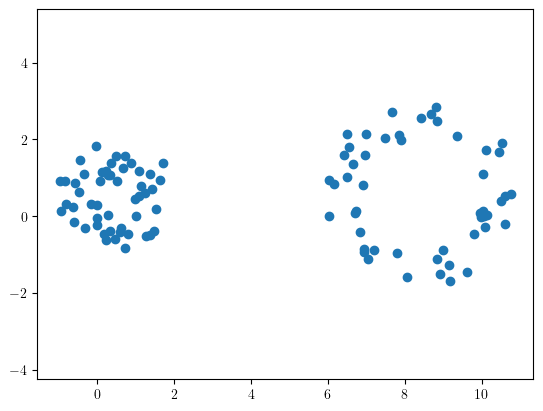

Dimension 0


<Figure size 640x480 with 0 Axes>

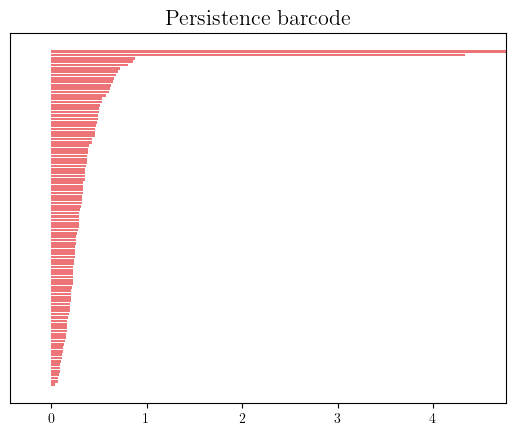

Dimension 1


<Figure size 640x480 with 0 Axes>

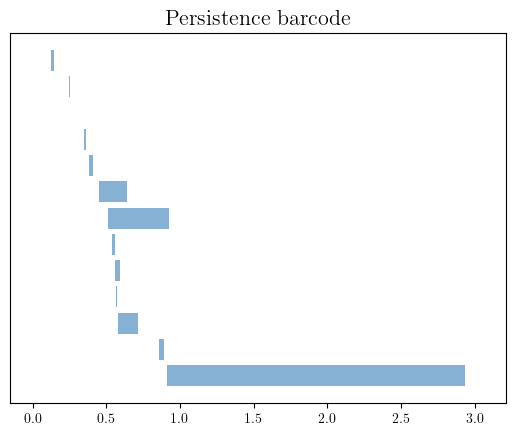

<Figure size 640x480 with 0 Axes>

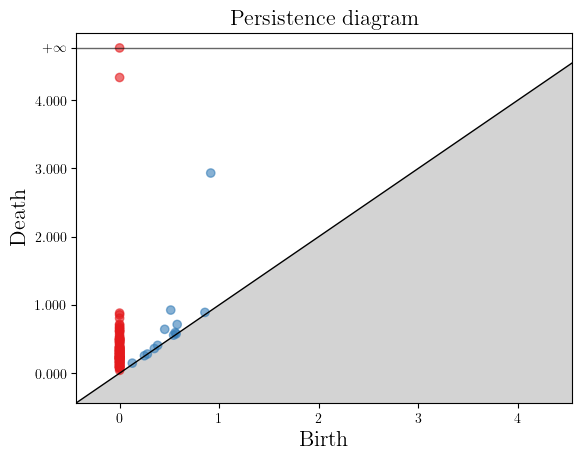

In [17]:
# Pick parameters:
radius = 2
x_offset = 8
noise1 = 1
noise2 = 1
num_points1 = 50
num_points2 = 50

X = create_circle_data(radius,x_offset,noise1 = noise1, noise2 = noise2, num_points1 = num_points1, num_points2 = num_points2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')

## 3-Dimensional Datasets

Next we can look at some simple 3-dimensional point clouds. We'll start with a sphere.

In [19]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    """
    Generates random samples on a unit sphere of the given dimensions.

    Parameters:
        - npoints : integer : number of points to generate
        - ndim: integer : Dimensions of the sphere, default value is 3

    Returns:
        - sample : ndarray : Object, array of shape [npoints, ndim] containing random samples.
    """
    # Generate an ndarray of shape (ndim, npoints) with normal disribution random numbers 
    sample = np.random.randn(ndim, npoints)
    # Divide each column by its length, so it lies on the unit sphere
    sample /= np.linalg.norm(sample, axis=0)
    # Transpose the matrix to get an (npoints, ndim) ndarray
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    """
    Adds Gaussian noise to the samples generated in `sample_spherical` function.
    
    Parameters:
        - npoints : integer : number of points to generate
        - ndim: integer : Dimensions of the sphere
        - noise_level : float : Variance of Gaussian noise 

    Returns:
        - sample : ndarray : Object, array of shape [npoints, ndim] containing noisy samples.
    """
    # Calls sample_spherical to generate a sphere with some number of points and dimensions
    sphere = sample_spherical(npoints, ndim)
    # Forms a noise matrix by using a multivariate gaussian with mean 0 and specified covariance(noise_level*np.eye(ndim))
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    # adds some gaussian noise to the dataset at each sample along every dimension
    sample = sphere + noise
    return sample


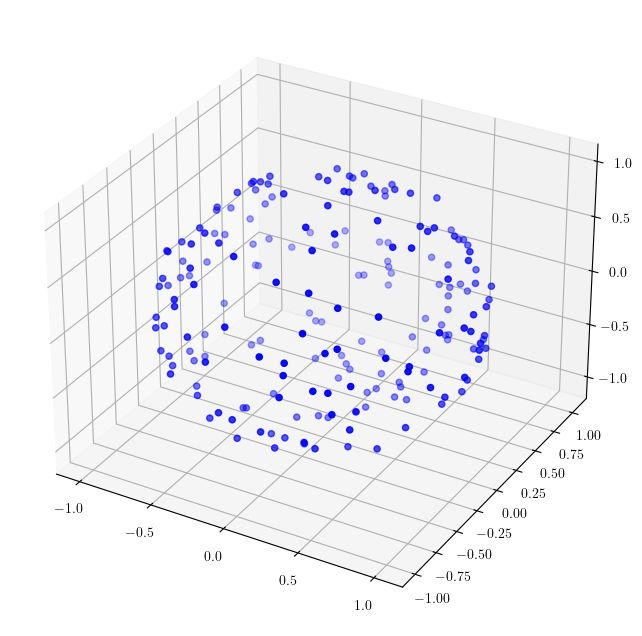

In [26]:
data = noisy_sample_spherical(200,3,noise_level = .001)
# Generate the noisy circle.

# Plot the data as a scatter plot.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d', adjustable='box')
ax.scatter(data[:,0],data[:,1],data[:,2], c='b', marker='o');

For this example, we'd like to look at higher dimensional homology. Unfortunately, `gudhi` is a bit slow for computing higher dimensional persistent homology (I believe that it has some ways to sparsify simplicial complexes, which may make it faster). You can try running the function we created above, but it will take quite a while to run.

Dimension 0


<Figure size 640x480 with 0 Axes>

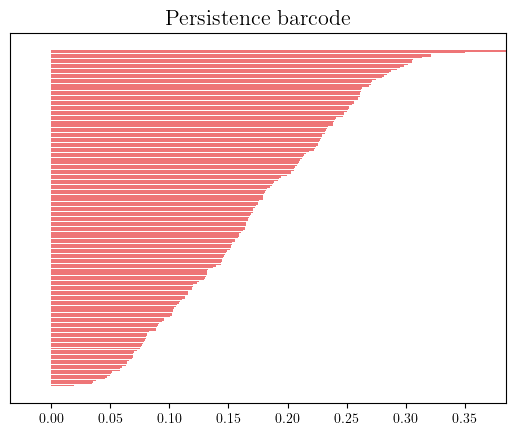

Dimension 1


<Figure size 640x480 with 0 Axes>

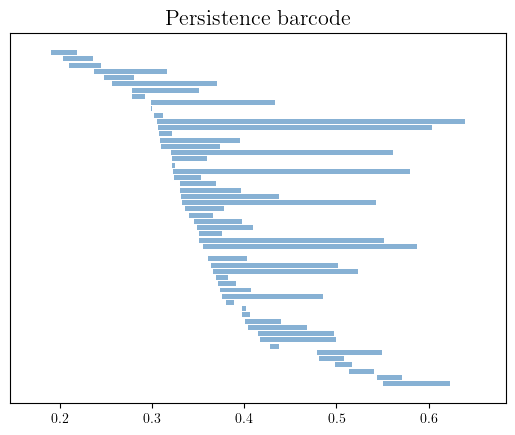

Dimension 2


<Figure size 640x480 with 0 Axes>

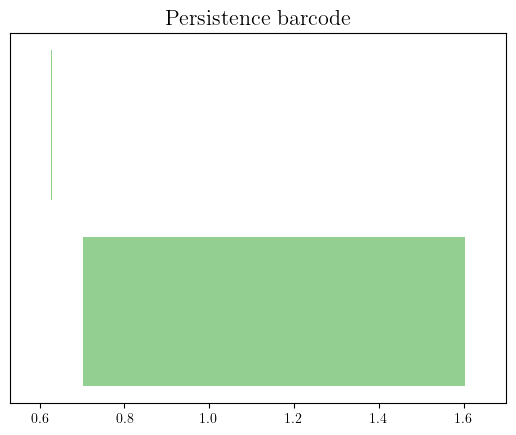

In [27]:
visualize_persistent_homology(data, max_dimension=3)

We can instead use a different TDA package which is optimized specifically to handle Vietoris-Rips persistent homology on point clouds. The algorithm is called `ripser`. To install `ripser` as well as the `persim` package (which includes some visualization tools, plus some functions for vectorizing persistence diagrams that we will discuss later), you can install the `scikit-tda` package: see https://scikit-tda.org/index.html. 

**Disclaimer:** I've seen people have trouble installing these packages, in particular on Windows machines.

In [28]:
from ripser import ripser
from persim import plot_diagrams 

`ripser` does the job a lot more quickly, but is still not super fast if we compute higher dimensional persistent homology on large point clouds. You can experiment with parameters here to see how far you can push this.

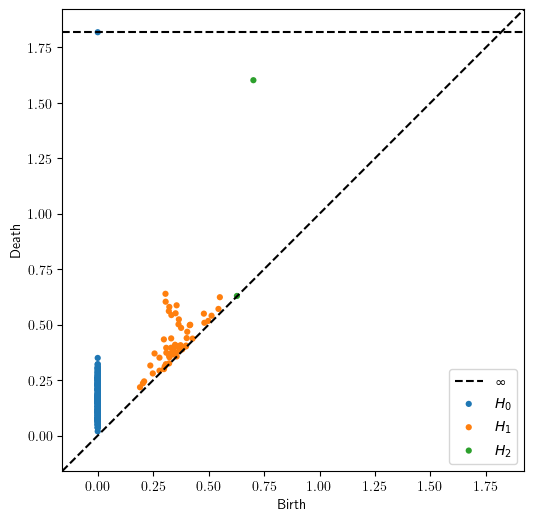

CPU times: user 1.48 s, sys: 691 ms, total: 2.17 s
Wall time: 5.33 s


In [29]:
%%time
dgms = ripser(data, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

The following point cloud lies on the surface of a donut in 3-dimensional space (called a *torus*).

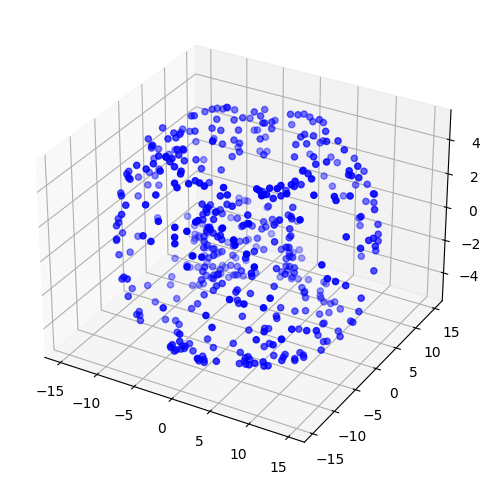

In [46]:
N = 500
r = 5
R = 10

theta = 2*np.pi*np.random.rand(N)
phi = 2*np.pi*np.random.rand(N)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta) 
Z = r *  np.sin(phi)
pointCloud = np.append(X.reshape(N,1),Y.reshape(N,1),axis =1)
pointCloud = np.append(pointCloud,Z.reshape(N,1), axis = 1)


fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d', adjustable='box')
ax.scatter(pointCloud[:,0],pointCloud[:,1],pointCloud[:,2], c='b', marker='o');

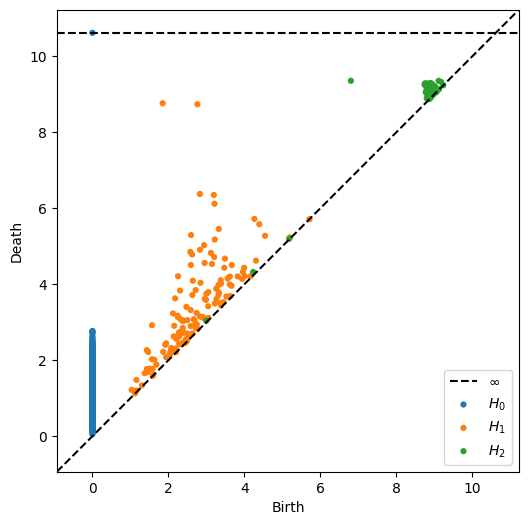

CPU times: user 9.54 s, sys: 965 ms, total: 10.5 s
Wall time: 9.74 s


In [47]:
%%time
dgms = ripser(pointCloud, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

When sampling a torus, we need to sample fairly densely to get a strong topological signal.

`Ripser++` is a recent package for computing persistent homology using both CPU and GPU. It is supposed to be faster than `Ripser`. If you are interested, you can have a look at https://github.com/simonzhang00/ripser-plusplus